In [57]:
import numpy as np
import h5py
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import display
from PIL import Image
import ast
import time as tt

In [58]:
# get simulation time details
def convert_hecras_timedata(time_data):
    time_series = []
    for tstep in time_data:
        time_str = tstep.decode('UTF-8')  # Convert byte data to str
        time_stamp = datetime.strptime(time_str, '%d%b%Y %H:%M:%S')  # Convert to datetime
        time_series.append(time_stamp)  # Append timestep to timeseries

    time = np.array(time_series)  # Convert to numpy array
    return time

def get_timedata(path):
    hec = h5py.File(path, 'r')  # Open to read data
    # Get time data
    time_data = hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series'] \
        ['Time Date Stamp']

    time = convert_hecras_timedata(time_data)

    hec.close()  # Close

    return time

#### Read HDF file

In [59]:
hec_result_path = "../data/Model1/raw/HEC-RAS_Results/BeaverLAKE_Pipe_Mod.p13.hdf"
hec = h5py.File(hec_result_path, 'r')
time_list = get_timedata(hec_result_path)
value = np.array(hec['Geometry']['2D Flow Areas'])[6]
value

np.str_('US Beaver')

### 1. Dynamic Features
#### 1.1 1D Node Features
##### To get the location of each 1D nodes, refer to the Nodes_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.1.1 Water Levels (units: fts)

In [60]:
WSE = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Nodes']['Water Surface'])
column_names = [str(i) for i in range(WSE.shape[1])]
WSE = pd.DataFrame(WSE, columns=column_names)
WSE.insert(0, "Time", time_list)
WSE = WSE.set_index('Time')
WSE

0           1           2           3  \
Time                                                                  
2025-10-02 00:00:00  292.136108  286.600006  310.099701  309.178406   
2025-10-02 00:05:00  292.136108  286.600006  310.099701  309.178406   
2025-10-02 00:10:00  292.136108  286.600006  310.099701  309.178406   
2025-10-02 00:15:00  292.136108  286.600006  310.099701  309.178406   
2025-10-02 00:20:00  292.136108  286.600006  310.099701  309.178406   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  292.181549  286.673370  310.152985  309.231781   
2025-10-02 11:45:00  292.180939  286.672516  310.150726  309.231415   
2025-10-02 11:50:00  292.181152  286.672607  310.152191  309.231567   
2025-10-02 11:55:00  292.182251  286.674072  310.153656  309.232697   
2025-10-02 12:00:00  292.183777  286.676147  310.155182  309.233856   

                              4           5           6           7  \
Time                                                                  
2025-10-02 00:00:00  310.384491  313.185455  324.916504  345.260651   
2025-10-02 00:05:00  310.384491  313.185455  324.916504  345.260651   
2025-10-02 00:10:00  310.384491  313.185455  324.916504  345.260651   
2025-10-02 00:15:00  310.384491  313.185455  324.916504  345.260651   
2025-10-02 00:20:00  310.384491  313.185455  324.916504  345.260651   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  310.384491  313.185455  324.916504  345.260651   
2025-10-02 11:45:00  310.384491  313.185455  324.916504  345.260651   
2025-10-02 11:50:00  310.384491  313.185455  324.916504  345.260651   
2025-10-02 11:55:00  310.384491  313.185455  324.916504  345.260651   
2025-10-02 12:00:00  310.384491  313.185455  324.916504  345.260651   

                              8           9          10          11  \
Time                                                                  
2025-10-02 00:00:00  347.952454  312.250000  295.783966  292.846039   
2025-10-02 00:05:00  347.952454  312.250000  295.783966  292.846039   
2025-10-02 00:10:00  347.952454  312.250000  295.783966  292.846039   
2025-10-02 00:15:00  347.952454  312.250000  295.783966  292.846039   
2025-10-02 00:20:00  347.952454  312.250000  295.783966  292.846039   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  347.952454  312.338440  295.791718  292.901276   
2025-10-02 11:45:00  347.952454  312.250000  295.791656  292.900513   
2025-10-02 11:50:00  347.952454  312.250000  295.792511  292.900604   
2025-10-02 11:55:00  347.952454  312.250000  295.793182  292.901794   
2025-10-02 12:00:00  347.952454  312.342651  295.793884  292.903534   

                             12          13          14          15  \
Time                                                                  
2025-10-02 00:00:00  295.007721  297.620544  297.261414  297.465240   
2025-10-02 00:05:00  295.007721  297.620544  297.261414  297.465240   
2025-10-02 00:10:00  295.007721  297.620544  297.261414  297.465240   
2025-10-02 00:15:00  295.007721  297.620544  297.261414  297.465240   
2025-10-02 00:20:00  295.007721  297.620544  297.261414  297.465240   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  295.063873  297.626404  297.271759  297.520538   
2025-10-02 11:45:00  295.063080  297.626343  297.271667  297.519806   
2025-10-02 11:50:00  295.063446  297.627380  297.272125  297.520142   
2025-10-02 11:55:00  295.064758  297.628906  297.272797  297.521088   
2025-10-02 12:00:00  295.066589  297.630035  297.273468  297.522491   

                             16  
Time                             
2025-10-02 00:00:00  304.053833  
2025-10-02 00:05:00  304.053833  
2025-10-02 00:10:00  304.053833  
2025-10-02 00:15:00  304.053833  
2025-10-02 00:20:00  304.053833  
...                         ...  
2025-10-02 11:40:00  304.096741  
2025-10-02 11:45:00  304.096

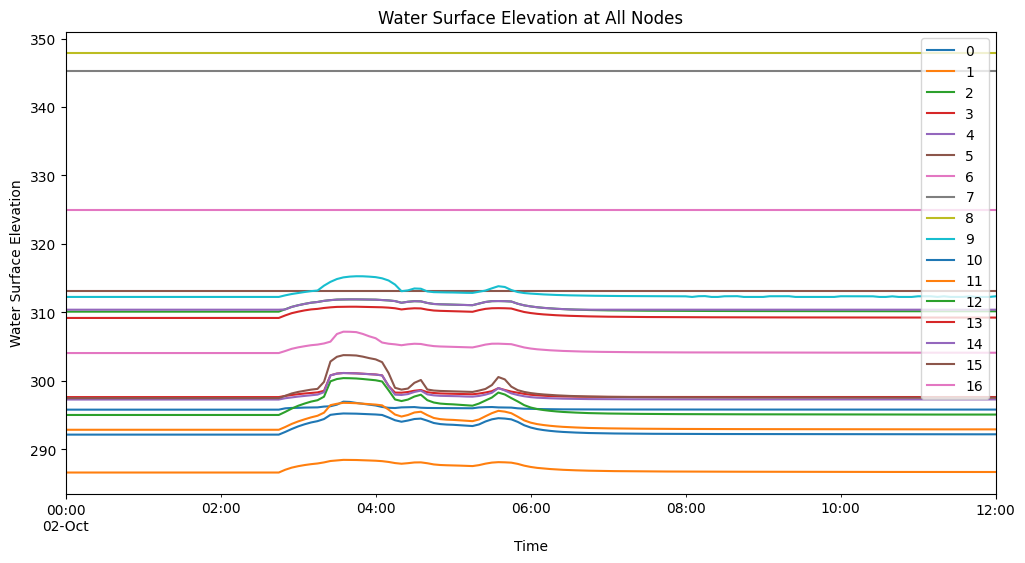

In [61]:
WSE.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Water Surface Elevation")
plt.title("Water Surface Elevation at All Nodes")
plt.show()

#### 1.1.2 Flow from 2D cells to 1D nodes (Units: ft^3/s)
##### To see the connections between 1D to 2D open Node1D_to_Node2D_Links.shp file

In [62]:
Inlet_Flow = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Nodes']['Drop Inlet Flow'])
column_names = [str(i) for i in range(Inlet_Flow.shape[1])]
Inlet_Flow = pd.DataFrame(Inlet_Flow, columns=column_names)
Inlet_Flow.insert(0, "Time", time_list)
Inlet_Flow = Inlet_Flow.set_index('Time')
Inlet_Flow

0    1         2    3    4    5    6    7    8    9  \
Time                                                                         
2025-10-02 00:00:00  0.0  0.0 -0.000000 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
2025-10-02 00:05:00  0.0  0.0 -0.000000 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
2025-10-02 00:10:00  0.0  0.0 -0.000000 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
2025-10-02 00:15:00  0.0  0.0 -0.000000 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
2025-10-02 00:20:00  0.0  0.0 -0.000000 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
...                  ...  ...       ...  ...  ...  ...  ...  ...  ...  ...   
2025-10-02 11:40:00  0.0  0.0  0.005950 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
2025-10-02 11:45:00  0.0  0.0  0.005785 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
2025-10-02 11:50:00  0.0  0.0  0.006075 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
2025-10-02 11:55:00  0.0  0.0  0.006684 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   
2025-10-02 12:00:00  0.0  0.0  0.007542 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0   

                           10   11   12        13        14   15        16  
Time                                                                        
2025-10-02 00:00:00 -0.000000 -0.0  0.0 -0.000000 -0.000000  0.0 -0.000000  
2025-10-02 00:05:00 -0.000000 -0.0  0.0 -0.000000 -0.000000  0.0 -0.000000  
2025-10-02 00:10:00 -0.000000 -0.0  0.0 -0.000000 -0.000000  0.0 -0.000000  
2025-10-02 00:15:00 -0.000000 -0.0  0.0 -0.000000 -0.000000  0.0 -0.000000  
2025-10-02 00:20:00 -0.000000 -0.0  0.0 -0.000000 -0.000000  0.0 -0.000000  
...                       ...  ...  ...       ...       ...  ...       ...  
2025-10-02 11:40:00  0.000761 -0.0  0.0  0.000466  0.001455  0.0  0.000326  
2025-10-02 11:45:00  0.000743 -0.0  0.0  0.000456  0.001425  0.0  0.000315  
2025-10-02 11:50:00  0.001017 -0.0  0.0  0.000604  0.001606  0.0  0.000465  
2025-10-02 11:55:00  0.001247 -0.0  0.0  0.000846  0.001887  0.0  0.000549  
2025-10-02 12:00:00  0.001499 -0.0  0.0  0.001116  0.002178  0.0  0.000652  

[145 rows x 17 columns]

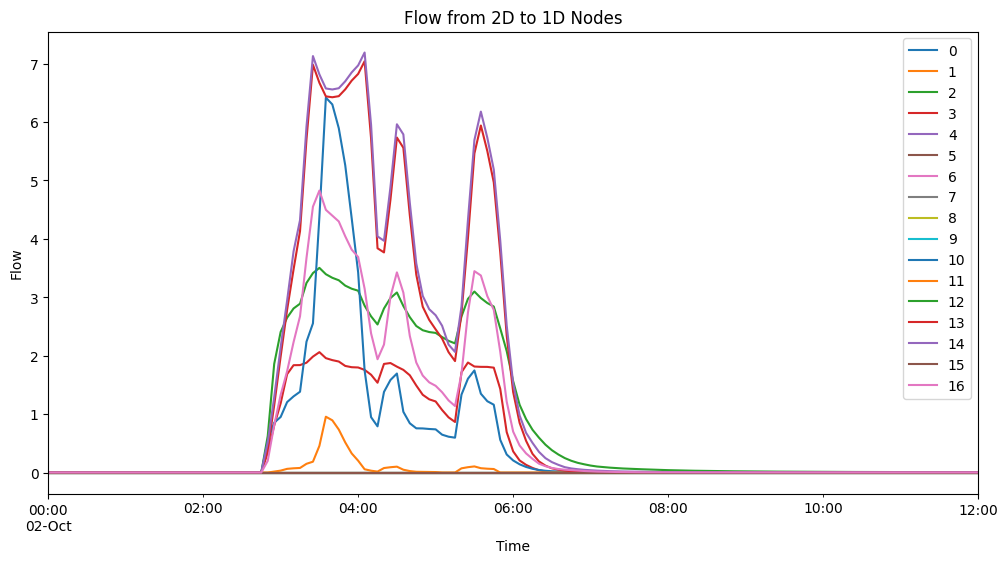

In [63]:
Inlet_Flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow from 2D to 1D Nodes")
plt.show()

#### 1.2 1D Link Features
##### To get the location of each 1D link, refer to the Links_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.2.1 Velocity (units: ft/s)

In [64]:
vel_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Vel DS'])
vel_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Vel US'])
vel = (vel_DS + vel_US)/2
column_names = [str(i) for i in range(vel.shape[1])]
vel = pd.DataFrame(vel, columns=column_names)
vel.insert(0, "Time", time_list)
vel = vel.set_index('Time')
vel

0         1         2         3    4    5    6  \
Time                                                                         
2025-10-02 00:00:00  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
2025-10-02 00:05:00  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
2025-10-02 00:10:00  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
2025-10-02 00:15:00  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
2025-10-02 00:20:00  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
...                       ...       ...       ...       ...  ...  ...  ...   
2025-10-02 11:40:00  1.017294  1.126688  0.001931  0.000712  0.0  0.0  0.0   
2025-10-02 11:45:00  1.007415  1.108613  0.001911  0.000702  0.0  0.0  0.0   
2025-10-02 11:50:00  1.010109  1.114084  0.001876  0.000693  0.0  0.0  0.0   
2025-10-02 11:55:00  1.027662  1.138748  0.001844  0.000684  0.0  0.0  0.0   
2025-10-02 12:00:00  1.052130  1.153276  0.001811  0.000675  0.0  0.0  0.0   

                            7         8         9        10        11  \
Time                                                                    
2025-10-02 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:05:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:10:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:15:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:20:00  0.000000  0.000000  0.000000  0.000000  0.000000   
...                       ...       ...       ...       ...       ...   
2025-10-02 11:40:00  1.498961  0.630956  1.004281  0.954695  0.457780   
2025-10-02 11:45:00  0.492968  0.627734  0.995211  0.946099  0.454051   
2025-10-02 11:50:00  0.512046  0.674911  0.995859  0.949394  0.504018   
2025-10-02 11:55:00  0.505746  0.710379  1.009846  0.963706  0.565359   
2025-10-02 12:00:00  1.506859  0.745783  1.030325  0.983709  0.609812   

                           12        13        14        15  
Time                                                         
2025-10-02 00:00:00  0.000000  0.000000  0.000000  0.000000  
2025-10-02 00:05:00  0.000000  0.000000  0.000000  0.000000  
2025-10-02 00:10:00  0.000000  0.000000  0.000000  0.000000  
2025-10-02 00:15:00  0.000000  0.000000  0.000000  0.000000  
2025-10-02 00:20:00  0.000000  0.000000  0.000000  0.000000  
...                       ...       ...       ...       ...  
2025-10-02 11:40:00  0.660601  1.069638  1.365206  1.164820  
2025-10-02 11:45:00  0.657347  1.059849  1.354214  1.158225  
2025-10-02 11:50:00  0.676674  1.062914  1.360364  1.161269  
2025-10-02 11:55:00  0.705360  1.074287  1.375550  1.174476  
2025-10-02 12:00:00  0.732773  1.091801  1.397797  1.191998  

[145 rows x 16 columns]

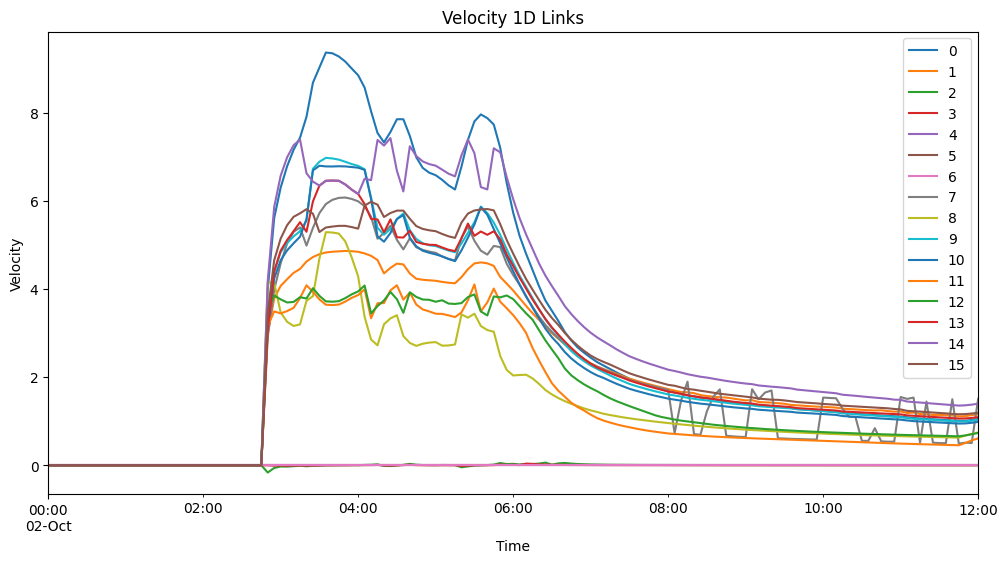

In [65]:
vel.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity 1D Links")
plt.show()

#### 1.2.2 Flow (Units: ft^3/s)

In [66]:
flow_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Pipe Flow DS'])
flow_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Pipe Flow US'])
flow = (flow_DS + flow_US)/2
column_names = [str(i) for i in range(flow.shape[1])]
flow = pd.DataFrame(flow, columns=column_names)
flow.insert(0, "Time", time_list)
flow = flow.set_index('Time')
flow

0         1             2             3    4    5  \
Time                                                                            
2025-10-02 00:00:00  0.000000  0.000000  0.000000e+00  0.000000e+00  0.0  0.0   
2025-10-02 00:05:00  0.000000  0.000000  0.000000e+00  0.000000e+00  0.0  0.0   
2025-10-02 00:10:00  0.000000  0.000000  0.000000e+00  0.000000e+00  0.0  0.0   
2025-10-02 00:15:00  0.000000  0.000000  0.000000e+00  0.000000e+00  0.0  0.0   
2025-10-02 00:20:00  0.000000  0.000000  0.000000e+00  0.000000e+00  0.0  0.0   
...                       ...       ...           ...           ...  ...  ...   
2025-10-02 11:40:00  0.031246  0.028157  1.053943e-09  2.467272e-10  0.0  0.0   
2025-10-02 11:45:00  0.030458  0.026858  1.019518e-09  2.385637e-10  0.0  0.0   
2025-10-02 11:50:00  0.030630  0.027333  9.788124e-10  2.307824e-10  0.0  0.0   
2025-10-02 11:55:00  0.032018  0.028991  9.410170e-10  2.233603e-10  0.0  0.0   
2025-10-02 12:00:00  0.034026  0.030098  9.048816e-10  2.162758e-10  0.0  0.0   

                       6         7         8         9        10        11  \
Time                                                                         
2025-10-02 00:00:00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:05:00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:10:00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:15:00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:20:00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
...                  ...       ...       ...       ...       ...       ...   
2025-10-02 11:40:00  0.0  0.054876  0.000761  0.030428  0.030349  0.000467   
2025-10-02 11:45:00  0.0  0.009920  0.000744  0.029655  0.029574  0.000457   
2025-10-02 11:50:00  0.0  0.011403  0.001013  0.029716  0.029839  0.000592   
2025-10-02 11:55:00  0.0  0.010826  0.001243  0.030920  0.031109  0.000834   
2025-10-02 12:00:00  0.0  0.058310  0.001495  0.032730  0.032956  0.001110   

                           12        13        14        15  
Time                                                         
2025-10-02 00:00:00  0.000000  0.000000  0.000000  0.000000  
2025-10-02 00:05:00  0.000000  0.000000  0.000000  0.000000  
2025-10-02 00:10:00  0.000000  0.000000  0.000000  0.000000  
2025-10-02 00:15:00  0.000000  0.000000  0.000000  0.000000  
2025-10-02 00:20:00  0.000000  0.000000  0.000000  0.000000  
...                       ...       ...       ...       ...  
2025-10-02 11:40:00  0.001456  0.028288  0.028157  0.027663  
2025-10-02 11:45:00  0.001425  0.027580  0.027516  0.027225  
2025-10-02 11:50:00  0.001601  0.027805  0.027871  0.027424  
2025-10-02 11:55:00  0.001882  0.028645  0.028761  0.028318  
2025-10-02 12:00:00  0.002173  0.029961  0.030097  0.029504  

[145 rows x 16 columns]

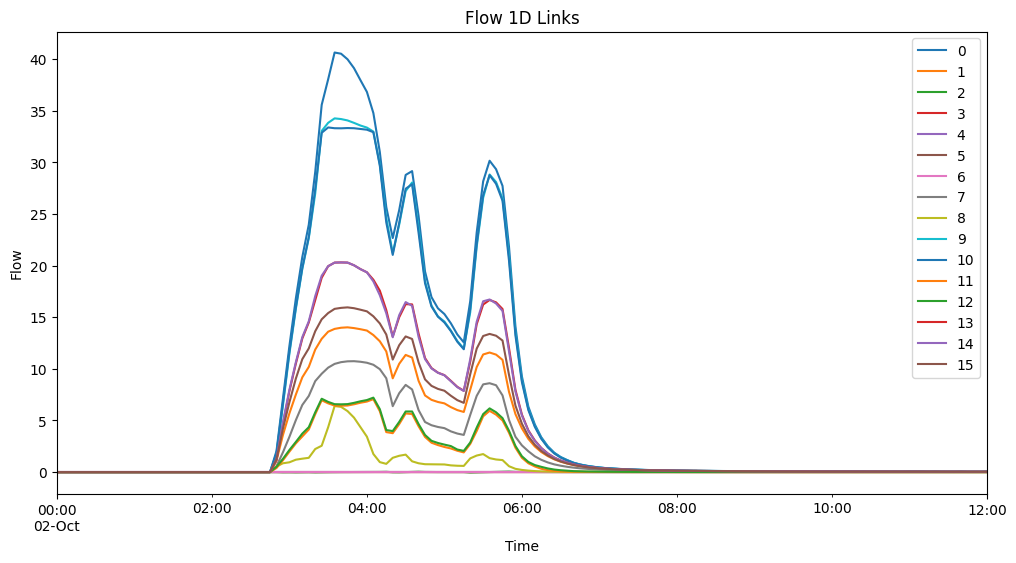

In [67]:
flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow 1D Links")
plt.show()

#### 1.3 2D Node features
##### To see node locations open and see Nodes_2D.shp, type = boundary are boundary nodes
#### 1.3.1 Water Level (Units: ft)

In [68]:
wl=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Water Surface'])
column_names = [str(i) for i in range(wl.shape[1])]
df = pd.DataFrame(wl, columns=column_names)
df.insert(0, "Time", time_list)
df = df.set_index('Time')
df

0           1           2           3  \
Time                                                                  
2025-10-02 00:00:00  329.750122  329.849091  329.693909  329.284271   
2025-10-02 00:05:00  329.750122  329.849091  329.693909  329.284271   
2025-10-02 00:10:00  329.750122  329.849091  329.693909  329.284271   
2025-10-02 00:15:00  329.750122  329.849091  329.693909  329.284271   
2025-10-02 00:20:00  329.750122  329.849091  329.693909  329.284271   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  329.759430  329.856018  329.703033  329.289978   
2025-10-02 11:45:00  329.759369  329.855988  329.703003  329.289948   
2025-10-02 11:50:00  329.762115  329.858704  329.705963  329.293243   
2025-10-02 11:55:00  329.764740  329.861298  329.708862  329.296326   
2025-10-02 12:00:00  329.767212  329.863708  329.711639  329.299072   

                              4           5           6           7  \
Time                                                                  
2025-10-02 00:00:00  328.352570  328.083435  327.548279  327.206451   
2025-10-02 00:05:00  328.352570  328.083435  327.548279  327.206451   
2025-10-02 00:10:00  328.352570  328.083435  327.548279  327.206451   
2025-10-02 00:15:00  328.352570  328.083435  327.548279  327.206451   
2025-10-02 00:20:00  328.352570  328.083435  327.548279  327.206451   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  328.358643  328.089722  327.554932  327.217743   
2025-10-02 11:45:00  328.358612  328.089691  327.554901  327.217651   
2025-10-02 11:50:00  328.361328  328.092133  327.557678  327.220398   
2025-10-02 11:55:00  328.363953  328.094543  327.560333  327.223145   
2025-10-02 12:00:00  328.366486  328.096863  327.562775  327.225891   

                              8           9  ...        3915        3916  \
Time                                         ...                           
2025-10-02 00:00:00  327.263702  328.286926  ...  352.727753  334.533508   
2025-10-02 00:05:00  327.263702  328.286926  ...  352.727753  334.533508   
2025-10-02 00:10:00  327.263702  328.286926  ...  352.727753  334.533508   
2025-10-02 00:15:00  327.263702  328.286926  ...  352.727753  334.533508   
2025-10-02 00:20:00  327.263702  328.286926  ...  352.727753  334.533508   
...                         ...         ...  ...         ...         ...   
2025-10-02 11:40:00  327.272888  328.307861  ...  355.318939  334.533508   
2025-10-02 11:45:00  327.272827  328.307739  ...  355.318298  334.533508   
2025-10-02 11:50:00  327.275665  328.310486  ...  355.317749  334.533508   
2025-10-02 11:55:00  327.278198  328.313232  ...  355.317200  334.533508   
2025-10-02 12:00:00  327.280365  328.315979  ...  355.316650  334.533508   

                           3917        3918        3919        3920  \
Time                                                                  
2025-10-02 00:00:00  334.678864  338.087463  293.149200  334.136322   
2025-10-02 00:05:00  334.678864  338.087463  293.149200  334.136322   
2025-10-02 00:10:00  334.678864  338.087463  293.149200  334.136322   
2025-10-02 00:15:00  334.678864  338.087463  293.149200  334.136322   
2025-10-02 00:20:00  334.678864  338.087463  293.149200  334.136322   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  334.678864  338.087463  293.219818  334.136322   
2025-10-02 11:45:00  334.678864  338.087463  293.219604  334.136322   
2025-10-02 11:50:00  334.678864  338.087463  293.222015  334.136322   
2025-10-02 11:55:00  334.678864  338.087463  293.224091  334.136322   
2025-10-02 12:00:00  334.678864  338.087463  293.226166  334.136322   

                           3921        3922        3923        3924  
Time                                                                 
2025-10-02 00:00:00  335.669128  356.890778  349.440094  352.327515  
2025-10-02 00:05:00  335.669128  356.890778  349.440094  35

#### 1.3.2 Water Volume (ft^3)

In [69]:
vol_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Cell Volume'])
column_names = [str(i) for i in range(vol_data.shape[1])]
vol_df = pd.DataFrame(vol_data, columns=column_names)
vol_df.insert(0, "Time", time_list)
vol_df = vol_df.set_index('Time')
vol_df

0         1         2         3         4  \
Time                                                                    
2025-10-02 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:05:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:10:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:15:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:20:00  0.000000  0.000000  0.000000  0.000000  0.000000   
...                       ...       ...       ...       ...       ...   
2025-10-02 11:40:00  0.075822  0.042449  0.050562  0.028594  0.036445   
2025-10-02 11:45:00  0.075369  0.042195  0.050261  0.028422  0.036226   
2025-10-02 11:50:00  0.097541  0.058826  0.066738  0.044788  0.052484   
2025-10-02 11:55:00  0.118956  0.074768  0.082759  0.060241  0.068315   
2025-10-02 12:00:00  0.139174  0.089542  0.098037  0.074002  0.083376   

                            5         6         7         8         9  ...  \
Time                                                                   ...   
2025-10-02 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2025-10-02 00:05:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2025-10-02 00:10:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2025-10-02 00:15:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2025-10-02 00:20:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
...                       ...       ...       ...       ...       ...  ...   
2025-10-02 11:40:00  0.041106  0.037963  0.065009  0.049628  0.114932  ...   
2025-10-02 11:45:00  0.040858  0.037734  0.064613  0.049325  0.114237  ...   
2025-10-02 11:50:00  0.056935  0.053599  0.080388  0.064515  0.129339  ...   
2025-10-02 11:55:00  0.072628  0.068763  0.096253  0.078252  0.144426  ...   
2025-10-02 12:00:00  0.087710  0.082718  0.111970  0.089956  0.159539  ...   

                           3915        3916        3917        3918  \
Time                                                                  
2025-10-02 00:00:00  352.727753  334.533508  334.678864  338.087463   
2025-10-02 00:05:00  352.727753  334.533508  334.678864  338.087463   
2025-10-02 00:10:00  352.727753  334.533508  334.678864  338.087463   
2025-10-02 00:15:00  352.727753  334.533508  334.678864  338.087463   
2025-10-02 00:20:00  352.727753  334.533508  334.678864  338.087463   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  355.318939  334.533508  334.678864  338.087463   
2025-10-02 11:45:00  355.318298  334.533508  334.678864  338.087463   
2025-10-02 11:50:00  355.317749  334.533508  334.678864  338.087463   
2025-10-02 11:55:00  355.317200  334.533508  334.678864  338.087463   
2025-10-02 12:00:00  355.316650  334.533508  334.678864  338.087463   

                           3919        3920        3921        3922  \
Time                                                                  
2025-10-02 00:00:00  293.149200  334.136322  335.669128  356.890778   
2025-10-02 00:05:00  293.149200  334.136322  335.669128  356.890778   
2025-10-02 00:10:00  293.149200  334.136322  335.669128  356.890778   
2025-10-02 00:15:00  293.149200  334.136322  335.669128  356.890778   
2025-10-02 00:20:00  293.149200  334.136322  335.669128  356.890778   
...                         ...         ...         ...         ...   
2025-10-02 11:40:00  293.219818  334.136322  335.669128  357.967316   
2025-10-02 11:45:00  293.219604  334.136322  335.669128  357.967285   
2025-10-02 11:50:00  293.222015  334.136322  335.669128  357.967346   
2025-10-02 11:55:00  293.224091  334.136322  335.669128  357.967407   
2025-10-02 12:00:00  293.226166  334.136322  335.669128  357.967468   

                           3923        3924  
Time                                         
2025-10-02 00:00:00  349.440094  352.327515  
2025-10-02 00:05:00  349.440094  352.327515  
2025-10-02 00:10:00  349.440094

#### 1.3.3 Rainfall (Units: inch)

In [83]:
# rainfall is cumulative; convert to DataFrame
rainfall = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']
                    ['Unsteady Time Series']['2D Flow Areas'][value]
                    ['Cell Cumulative Precipitation Depth'])

column_names = [str(i) for i in range(rainfall.shape[1])]
rain_df = pd.DataFrame(rainfall, columns=column_names)
rain_df.insert(0, "Time", time_list)
rain_df.set_index("Time", inplace=True)

# 🔻 Compute incremental rainfall (difference between time steps)
rain_increment = rain_df.diff()    # difference between rows
rain_increment.iloc[0] = rain_df.iloc[0]   # first timestep stays as-is

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

selected = rain_increment.iloc[:100]  # end is exclusive
print(selected)

# (optional) reset to default afterward
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


                            0         1         2         3         4  \
Time                                                                    
2025-10-02 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:05:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:10:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:15:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:20:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:25:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:30:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:35:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:40:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:45:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:50:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2025-10-02 00:55:00  0.000000  0.000000  0.000000  

In [80]:
from typing import Any

def get_interval_rainfall_like_pandas(hec_ras_path: str):
    cumulative = get_rainfall(
        hec_ras_path,
        perimeter_name=value
    ).astype(np.float64)   # 👈 critical

    interval = np.empty_like(cumulative)
    interval[:] = np.nan                   # pandas starts with NaN
    interval[1:] = cumulative[1:] - cumulative[:-1]
    interval[0] = cumulative[0]             # overwrite first row

    return interval

def get_rainfall(filepath: str, perimeter_name: str = 'US Beaver', dtype: np.dtype = np.float32) -> np.ndarray:
    property_path = f'Results.Unsteady.Output.Output Blocks.Base Output.Unsteady Time Series.2D Flow Areas.{perimeter_name}.Cell Cumulative Precipitation Depth'
    data = read_hdf_file_as_numpy(filepath=filepath, property_path=property_path)
    return data.astype(dtype)

def read_hdf_file_as_numpy(filepath: str, property_path: str, separator: str = '.') -> np.ndarray:
    with h5py.File(filepath, 'r') as hec:
        data = get_property_from_path(hec, property_path, separator)
        np_data = np.array(data)
    return np_data

def get_property_from_path(dict: dict, dict_path: str, separator: str = '.') -> Any:
    keys = dict_path.split(sep=separator)
    d = dict
    for key in keys:
        if key in d:
            d = d[key]
        else:
            raise KeyError(f'Key {key} not found in dictionary for path {dict_path}')
    return d

test_rainfall = get_interval_rainfall_like_pandas(hec_result_path)
np.testing.assert_allclose(
    test_rainfall,
    rain_increment.values,
    rtol=1e-8,
    atol=1e-10
)

Reading HDF file: ../data/Model1/raw/HEC-RAS_Results/BeaverLAKE_Pipe_Mod.p13.hdf


AssertionError: 
Not equal to tolerance rtol=1e-08, atol=1e-10

(shapes (3925,), (145, 3925) mismatch)
 ACTUAL: array([0., 0., 0., ..., 0., 0., 0.], shape=(3925,))
 DESIRED: array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],...

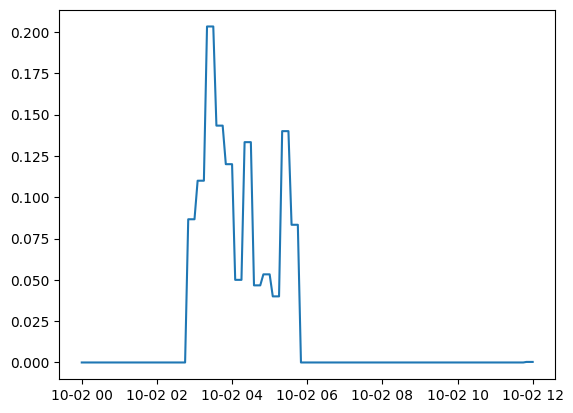

In [71]:
plt.plot(rain_increment['1'])

#### 1.4 2D Link Features
#### 1.4.1 Velocity (Units: ft/s)

In [72]:
vel=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Face Velocity'])
column_names = [str(i) for i in range(vel.shape[1])]
vel_df = pd.DataFrame(vel, columns=column_names)
vel_df.insert(0, "Time", time_list)
vel_df = vel_df.set_index('Time')
vel_df

0         1    2         3         4         5  \
Time                                                                         
2025-10-02 00:00:00  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2025-10-02 00:05:00  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2025-10-02 00:10:00  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2025-10-02 00:15:00  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2025-10-02 00:20:00  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
...                       ...       ...  ...       ...       ...       ...   
2025-10-02 11:40:00  0.006856 -0.004687  0.0  0.005948 -0.008541  0.006646   
2025-10-02 11:45:00  0.006802 -0.004649  0.0  0.005901 -0.008473  0.006593   
2025-10-02 11:50:00  0.008582 -0.006133  0.0  0.007424 -0.010056  0.008344   
2025-10-02 11:55:00  0.010407 -0.007663  0.0  0.008984 -0.011698  0.010121   
2025-10-02 12:00:00  0.012238 -0.009200  0.0  0.010551 -0.013403  0.011882   

                       6         7    8         9  ...      8134      8135  \
Time                                               ...                       
2025-10-02 00:00:00  0.0  0.000000  0.0  0.000000  ...  0.000000  0.000000   
2025-10-02 00:05:00  0.0  0.000000  0.0  0.000000  ...  0.000000  0.000000   
2025-10-02 00:10:00  0.0  0.000000  0.0  0.000000  ...  0.000000  0.000000   
2025-10-02 00:15:00  0.0  0.000000  0.0  0.000000  ...  0.000000  0.000000   
2025-10-02 00:20:00  0.0  0.000000  0.0  0.000000  ...  0.000000  0.000000   
...                  ...       ...  ...       ...  ...       ...       ...   
2025-10-02 11:40:00  0.0  0.004905 -0.0 -0.005378  ...  0.107276  0.086975   
2025-10-02 11:45:00  0.0  0.004865 -0.0 -0.005335  ...  0.106044  0.085994   
2025-10-02 11:50:00  0.0  0.005765 -0.0 -0.007076  ...  0.109501  0.088977   
2025-10-02 11:55:00  0.0  0.006698 -0.0 -0.008867  ...  0.114847  0.093328   
2025-10-02 12:00:00  0.0  0.007663 -0.0 -0.010660  ...  0.119442  0.097009   

                         8136      8137  8138  8139  8140  8141  8142  8143  
Time                                                                         
2025-10-02 00:00:00  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
2025-10-02 00:05:00  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
2025-10-02 00:10:00  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
2025-10-02 00:15:00  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
2025-10-02 00:20:00  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
...                       ...       ...   ...   ...   ...   ...   ...   ...  
2025-10-02 11:40:00  0.100384  0.008809   0.0   0.0   0.0   0.0   0.0   0.0  
2025-10-02 11:45:00  0.099215  0.008580   0.0   0.0   0.0   0.0   0.0   0.0  
2025-10-02 11:50:00  0.101019  0.008990   0.0   0.0   0.0   0.0   0.0   0.0  
2025-10-02 11:55:00  0.105788  0.009945   0.0   0.0   0.0   0.0   0.0   0.0  
2025-10-02 12:00:00  0.110811  0.011042   0.0   0.0   0.0   0.0   0.0   0.0  

[145 rows x 8144 columns]

#### 1.4.2 Flow (Units: ft^3/s)

In [73]:
flow_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Face Flow'])
column_names = [str(i) for i in range(flow_data.shape[1])]
flow_df = pd.DataFrame(flow_data, columns=column_names)
flow_df.insert(0, "Time", time_list)
flow_df = flow_df.set_index('Time')
flow_df

0             1    2             3         4  \
Time                                                                       
2025-10-02 00:00:00  0.000000  0.000000e+00  0.0  0.000000e+00  0.000000   
2025-10-02 00:05:00  0.000000  0.000000e+00  0.0  0.000000e+00  0.000000   
2025-10-02 00:10:00  0.000000  0.000000e+00  0.0  0.000000e+00  0.000000   
2025-10-02 00:15:00  0.000000  0.000000e+00  0.0  0.000000e+00  0.000000   
2025-10-02 00:20:00  0.000000  0.000000e+00  0.0  0.000000e+00  0.000000   
...                       ...           ...  ...           ...       ...   
2025-10-02 11:40:00  0.000002 -3.645105e-07  0.0  7.551442e-07 -0.000001   
2025-10-02 11:45:00  0.000002 -3.572785e-07  0.0  7.401820e-07 -0.000001   
2025-10-02 11:50:00  0.000003 -7.093715e-07  0.0  1.314038e-06 -0.000002   
2025-10-02 11:55:00  0.000006 -1.233097e-06  0.0  2.117795e-06 -0.000003   
2025-10-02 12:00:00  0.000008 -1.941840e-06  0.0  3.166344e-06 -0.000004   

                            5    6         7    8         9  ...      8134  \
Time                                                         ...             
2025-10-02 00:00:00  0.000000  0.0  0.000000  0.0  0.000000  ...  0.000000   
2025-10-02 00:05:00  0.000000  0.0  0.000000  0.0  0.000000  ...  0.000000   
2025-10-02 00:10:00  0.000000  0.0  0.000000  0.0  0.000000  ...  0.000000   
2025-10-02 00:15:00  0.000000  0.0  0.000000  0.0  0.000000  ...  0.000000   
2025-10-02 00:20:00  0.000000  0.0  0.000000  0.0  0.000000  ...  0.000000   
...                       ...  ...       ...  ...       ...  ...       ...   
2025-10-02 11:40:00  0.000005  0.0  0.000003  0.0 -0.000002  ...  0.005344   
2025-10-02 11:45:00  0.000005  0.0  0.000003  0.0 -0.000002  ...  0.005193   
2025-10-02 11:50:00  0.000009  0.0  0.000005  0.0 -0.000004  ...  0.005625   
2025-10-02 11:55:00  0.000014  0.0  0.000007  0.0 -0.000007  ...  0.006332   
2025-10-02 12:00:00  0.000021  0.0  0.000010  0.0 -0.000010  ...  0.006981   

                         8135      8136      8137  8138  8139  8140  8141  \
Time                                                                        
2025-10-02 00:00:00  0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0   
2025-10-02 00:05:00  0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0   
2025-10-02 00:10:00  0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0   
2025-10-02 00:15:00  0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0   
2025-10-02 00:20:00  0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0   
...                       ...       ...       ...   ...   ...   ...   ...   
2025-10-02 11:40:00  0.005380  0.005571  0.005532   0.0   0.0   0.0   0.0   
2025-10-02 11:45:00  0.005228  0.005417  0.005381   0.0   0.0   0.0   0.0   
2025-10-02 11:50:00  0.005677  0.005656  0.005651   0.0   0.0   0.0   0.0   
2025-10-02 11:55:00  0.006400  0.006314  0.006281   0.0   0.0   0.0   0.0   
2025-10-02 12:00:00  0.007067  0.007056  0.007022   0.0   0.0   0.0   0.0   

                     8142  8143  
Time                             
2025-10-02 00:00:00   0.0   0.0  
2025-10-02 00:05:00   0.0   0.0  
2025-10-02 00:10:00   0.0   0.0  
2025-10-02 00:15:00   0.0   0.0  
2025-10-02 00:20:00   0.0   0.0  
...                   ...   ...  
2025-10-02 11:40:00   0.0   0.0  
2025-10-02 11:45:00   0.0   0.0  
2025-10-02 11:50:00   0.0   0.0  
2025-10-02 11:55:00   0.0   0.0  
2025-10-02 12:00:00   0.0   0.0  

[145 rows x 8144 columns]

#### Notes
##### Open each shapefile in Geometry folder in QGIS to visualise the numerical computational mesh/nodes/links. 
##### You may see number of nodes in Nodes_2D.shp is higher than the Mesh_2D.shp
##### This is because HEC-RAS adds additional cells called ghost cells. Except the boundary nodes all other ghost cells can be removed.
##### Similarly all links connecting to or starting from ghost cells can be removed, except those connected to boundary nodes.
##### Boundary nodes are given as type = boundary in Nodes_2D.shp file
##### Following code gives all ghost cell indexes including boundary nodes


In [74]:
# identify ghost cells
min_elevation = np.array(hec['Geometry']['2D Flow Areas'][value]['Cells Minimum Elevation']) 
Ghost_cells_idx = np.where(np.isnan(min_elevation))[0]
Ghost_cells_idx

array([3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714,
       3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725,
       3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736,
       3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747,
       3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758,
       3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769,
       3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780,
       3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791,
       3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802,
       3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813,
       3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824,
       3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835,
       3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846,
       3847, 3848, 3849, 3850, 3851, 3852, 3853, 38